In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import torch
from glob import glob
import pandas as pd
from torchvision import datasets, transforms
import importlib
from ps3_functions import *
import torchvision
from matplotlib import cm
# importlib.reload(ps3_functions)

In [8]:
batch_size = 128
mnist_train = datasets.MNIST(root='data', train=True, download=True,
                             transform=transforms.ToTensor())
mnist_test = datasets.MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size)

model = Autoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()
# train(model, loss_fn, Adam, train_loader, test_loader)

number of epochs 101
epoch 0
loss 0.05186546593904495
56
56
72
72
49
49
45
45
44
44
epoch 1
loss 0.041058193892240524
56
56
72
72
49
49
45
45
44
44
epoch 2
loss 0.03795114904642105
56
56
72
72
49
49
45
45
44
44
epoch 3
loss 0.039167724549770355
56
56
72
72
49
49
45
45
44
44
epoch 4
loss 0.036180444061756134
56
56
72
72
49
49
45
45
44
44
epoch 5
loss 0.03513944894075394
56
56
72
72
49
49
45
45
44
44
epoch 6
loss 0.03506603464484215
56
56
72
72
49
49
45
45
44
44
epoch 7
loss 0.03350710868835449
56
56
72
72
49
49
45
45
44
44
epoch 8
loss 0.032996196299791336
56
56
72
72
49
49
45
45
44
44
epoch 9
loss 0.03356485441327095
56
56
72
72
49
49
45
45
44
44
epoch 10
loss 0.03431830182671547


/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


56
56
72
72
49
49
45
45
44
44
epoch 11
loss 0.032832417637109756
56
56
72
72
49
49
45
45
44
44
epoch 12
loss 0.032321516424417496
56
56
72
72
49
49
45
45
44
44
epoch 13
loss 0.032822009176015854
56
56
72
72
49
49
45
45
44
44
epoch 14
loss 0.032702893018722534
56
56
72
72
49
49
45
45
44
44
epoch 15
loss 0.03253617882728577
56
56
72
72
49
49
45
45
44
44
epoch 16
loss 0.0324750617146492
56
56
72
72
49
49
45
45
44
44
epoch 17
loss 0.03189628943800926
56
56
72
72
49
49
45
45
44
44
epoch 18
loss 0.031737226992845535
56
56
72
72
49
49
45
45
44
44
epoch 19
loss 0.032929427921772
56
56
72
72
49
49
45
45
44
44
epoch 20
loss 0.03163643553853035
56
56
72
72
49
49
45
45
44
44
epoch 21
loss 0.03386973589658737
56
56
72
72
49
49
45
45
44
44
epoch 22
loss 0.03211196884512901
56
56
72
72
49
49
45
45
44
44
epoch 23
loss 0.03126896172761917
56
56
72
72
49
49
45
45
44
44
epoch 24
loss 0.03147484362125397
56
56
72
72
49
49
45
45
44
44
epoch 25
loss 0.0314633771777153
56
56
72
72
49
49
45
45
44
44
epoch 26


KeyboardInterrupt: 

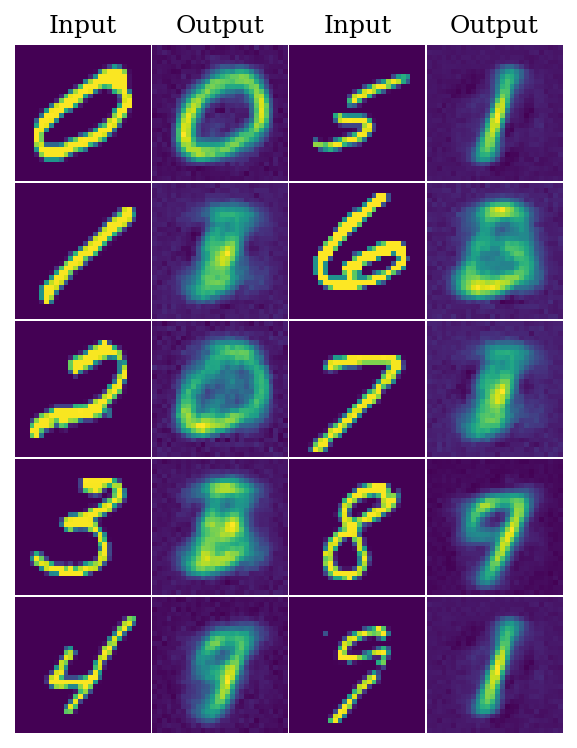

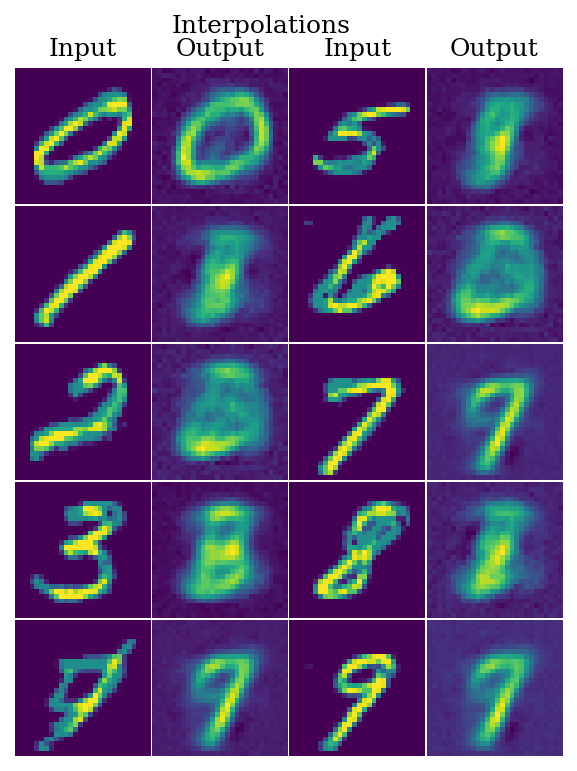

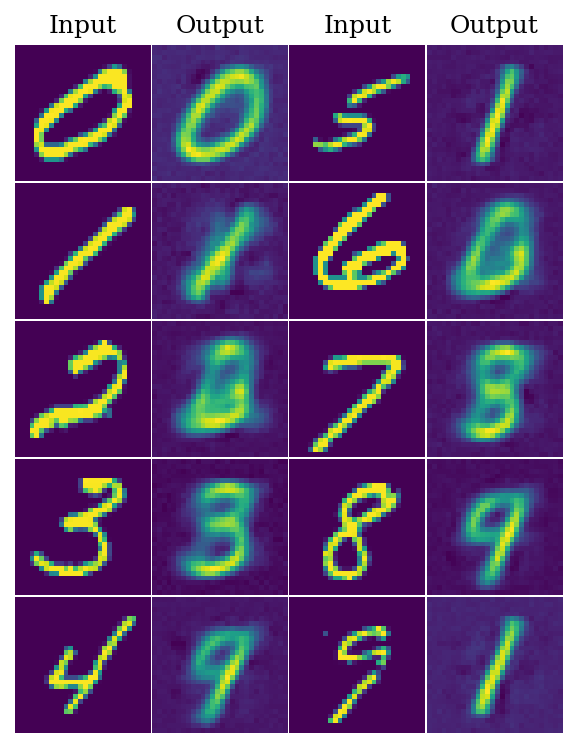

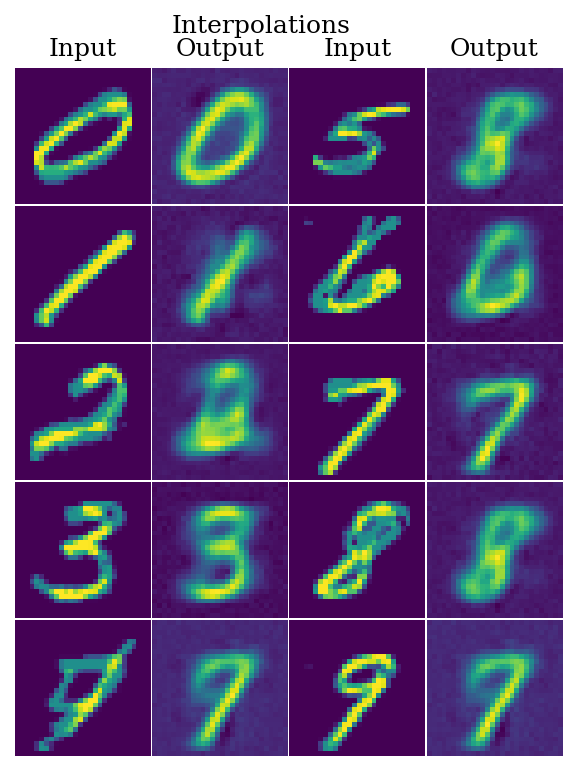

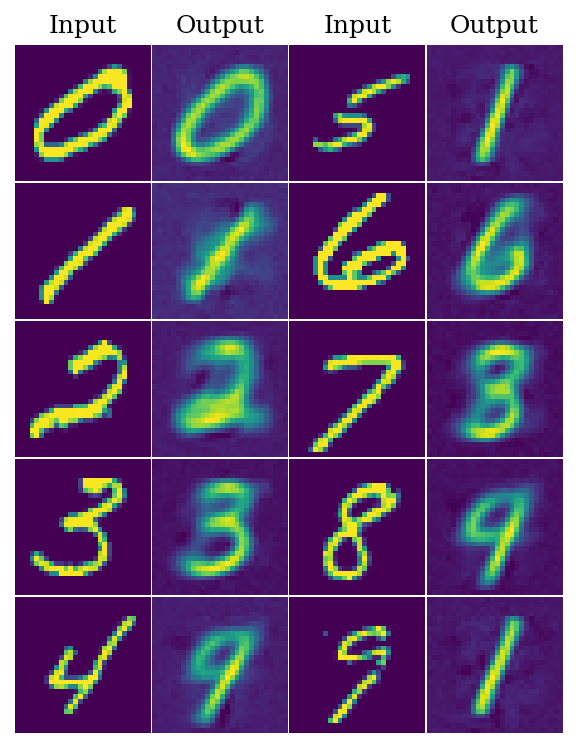

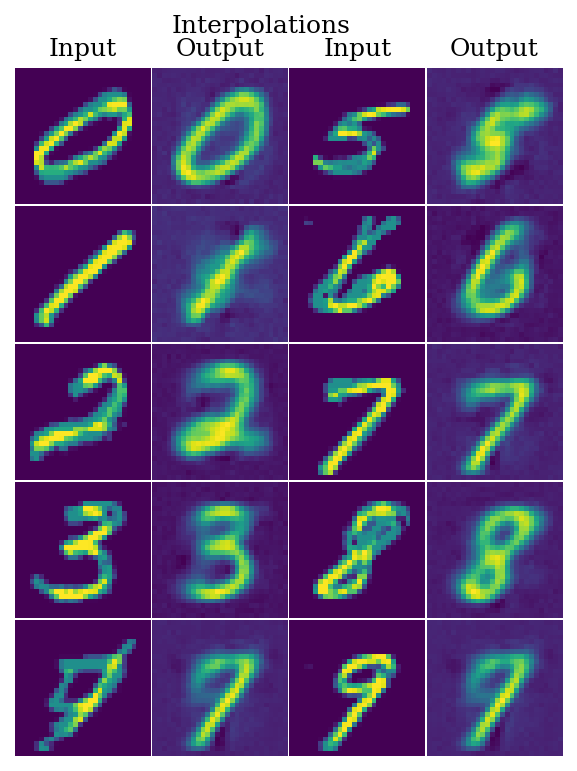

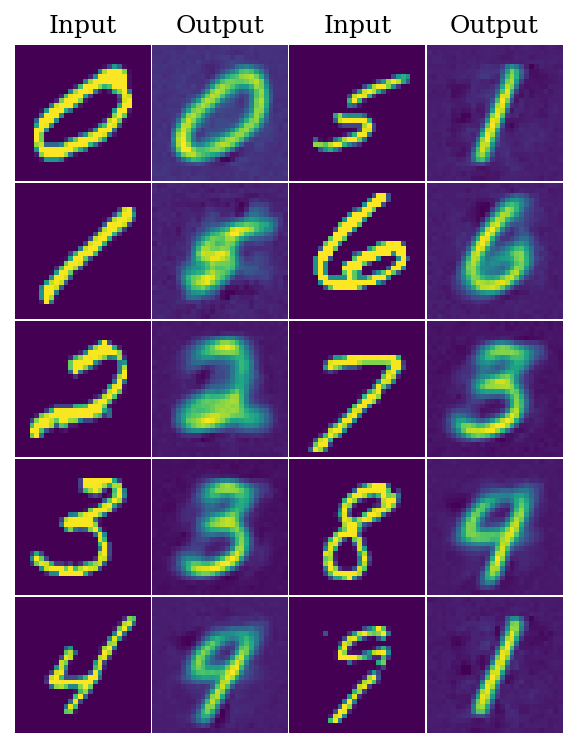

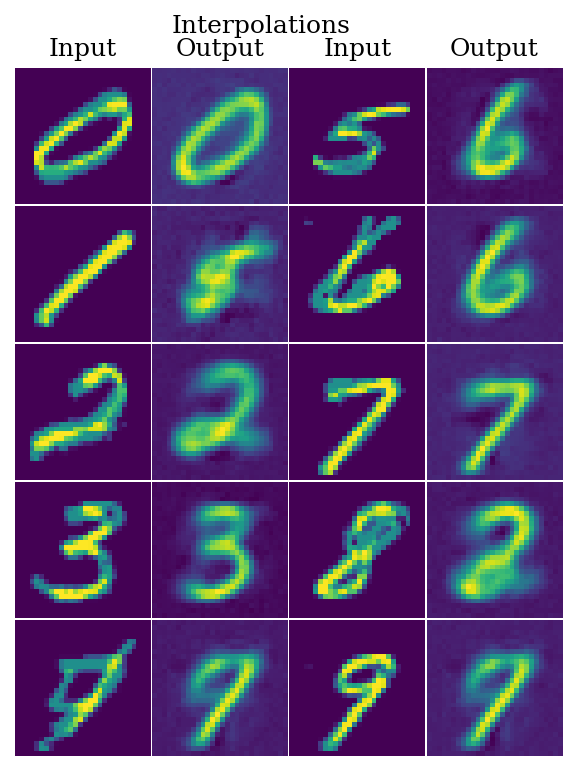

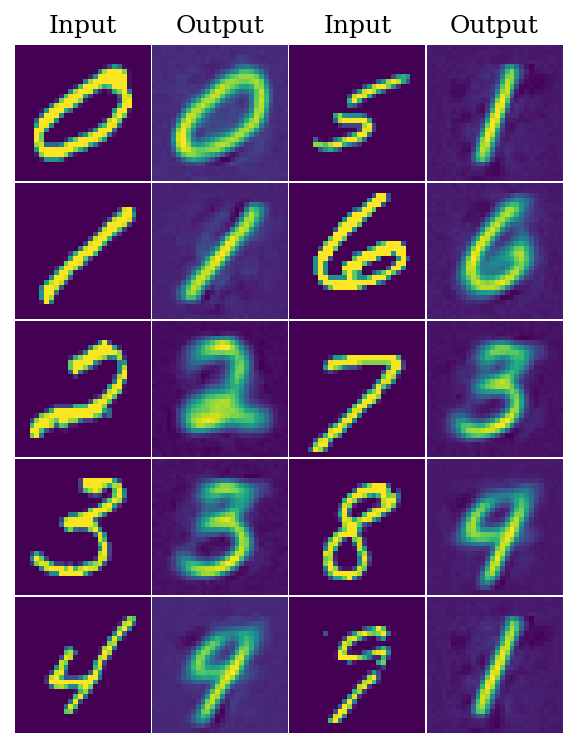

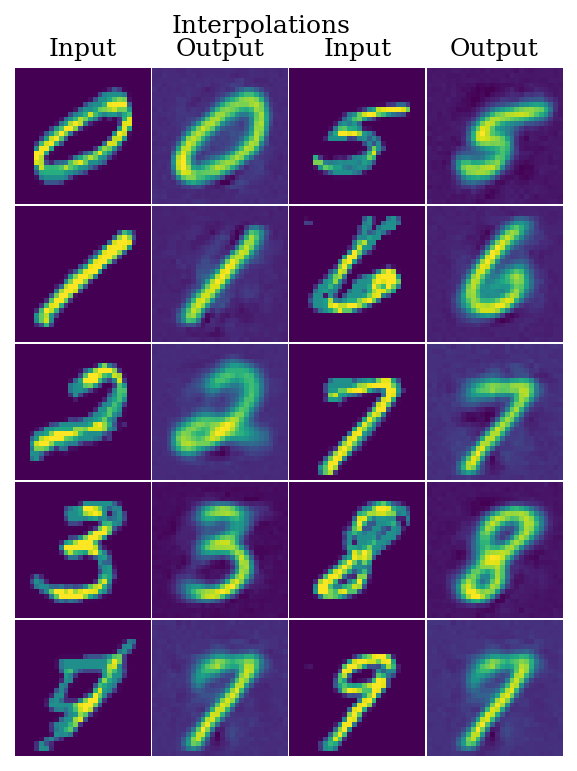

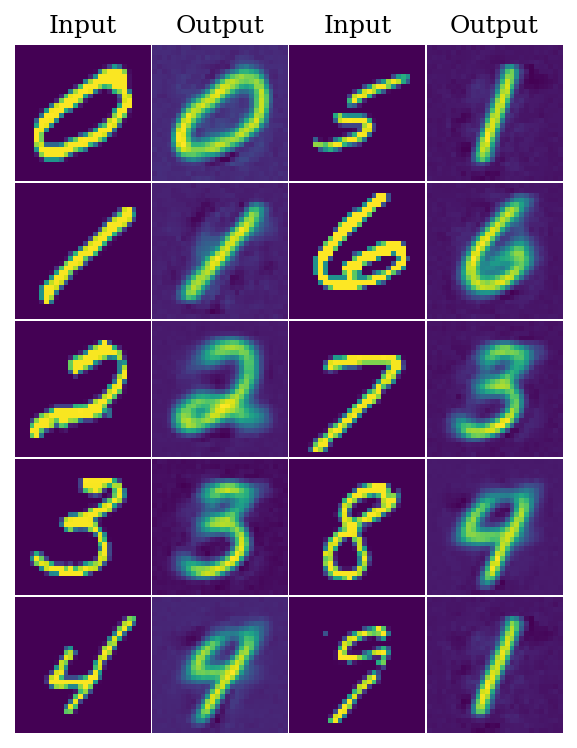

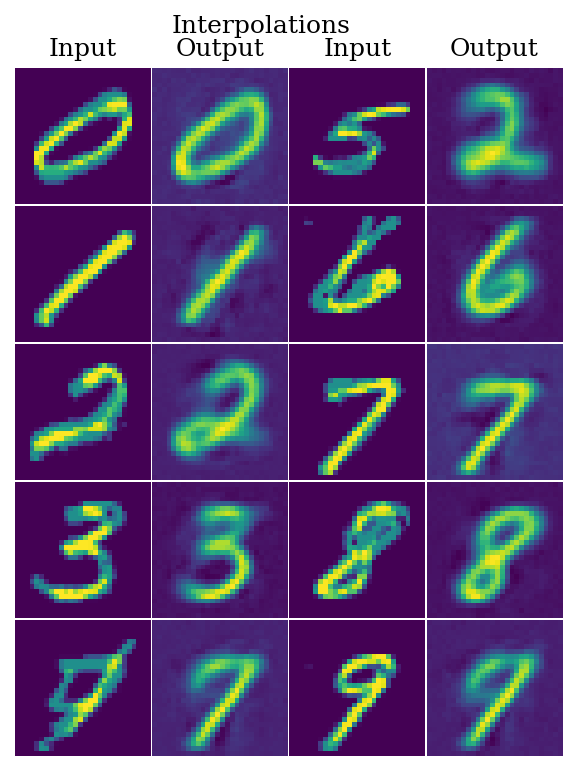

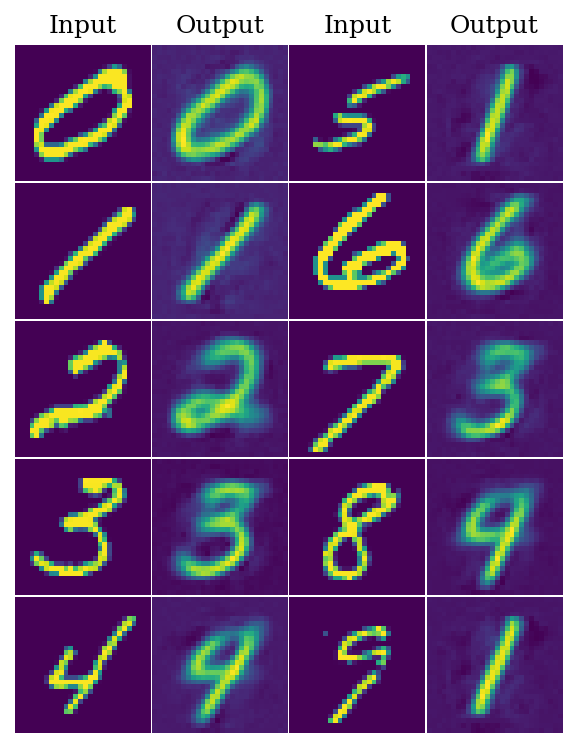

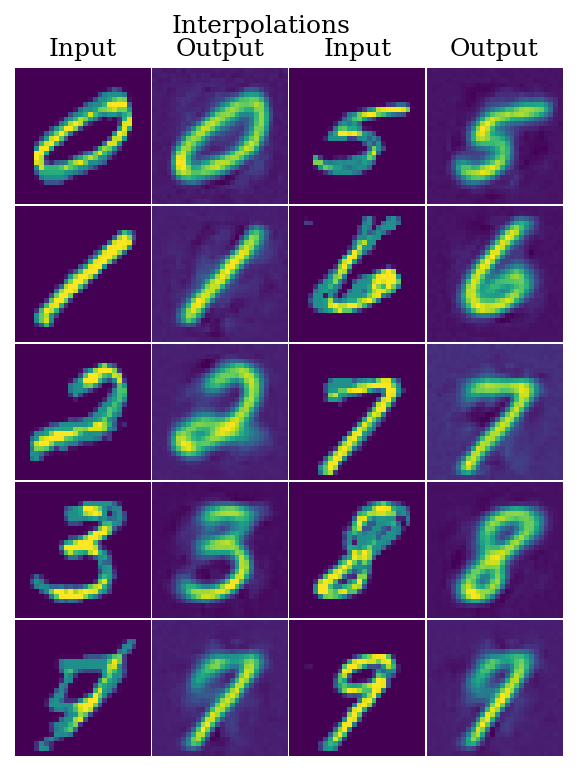

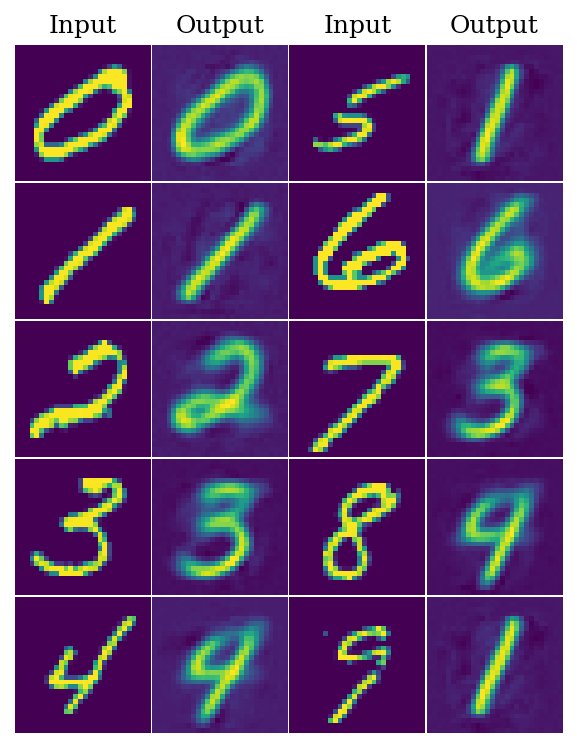

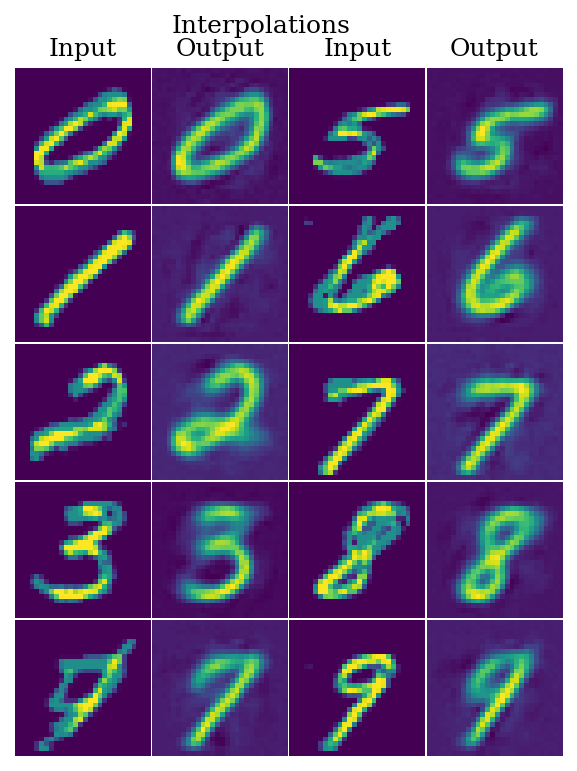

Error in callback <function flush_figures at 0x114689440> (for post_execute):


KeyboardInterrupt: 

In [9]:
num_epochs = 101
print("number of epochs", num_epochs)
for epoch in range(num_epochs):
    print("epoch", epoch)
    # loop through each data point in the training set
    for data, targets in train_loader:

        # run the model on the data
        Nsample = 128
        try:
            model_input = torch.reshape(data, [Nsample, 784]) #  Turn the 28 by 28 image tensors into a 784 dimensional tensor.
        except RuntimeError:
            break

        out = model(model_input)

        # Calculate the loss
        image_targets = model_input
        #print("image_targets.shape", image_targets.shape)
        loss = loss_fn(out, image_targets)

        # Find the gradients of our loss via backpropogation
        loss.backward()

        # Adjust accordingly with the optimizer
        optimizer.step()
        optimizer.zero_grad()
    print("loss", loss.item())
    fig, axispack = plt.subplots(figsize=(4.1, 5.1), nrows=5, ncols=4, dpi=150)
    for ii in range(5):
        idx = np.where(targets==ii)[0][0]#np.random.choice(np.where(targets==ii)[0])

        input_data = data[idx].numpy()
        input_data = input_data.reshape(28,28)

        axispack[ii][0].imshow(input_data)
        axispack[ii][0].axis('off')

        #output = out[idx].detach().numpy()
        output = torch.reshape(model.decode(model.encode(torch.reshape(data[idx], [1, 784]))), [28,28]).detach().numpy()
        output = output.reshape(28,28)

        axispack[ii][1].imshow(output)
        axispack[ii][1].axis('off')

        idx =np.where(targets==ii+5)[0][5] #np.random.choice(np.where(targets==ii+5)[0])
        input_data = data[idx].numpy()
        input_data = input_data.reshape(28,28)

        axispack[ii][2].imshow(input_data)
        axispack[ii][2].axis('off')
        output = out[idx].detach().numpy()
        output = output.reshape(28,28)

        axispack[ii][3].imshow(output)
        axispack[ii][3].axis('off')

    axispack[0][0].set_title("Input")
    axispack[0][1].set_title("Output")
    axispack[0][2].set_title("Input")
    axispack[0][3].set_title("Output")
    fig.subplots_adjust(left=0.1, bottom=0.01, right=0.99, top=0.91, wspace=0.01, hspace=0.01)
    plt.savefig("3_1_digits_epoch_{0}.png".format(int(epoch)), bbox_inches='tight', pad_inches=0.01)
    
    fig, axispack = plt.subplots(figsize=(4.1, 5.1), nrows=5, ncols=4, dpi=150)
    for ii in range(5):
        idx1 = np.where(targets==ii)[0][0]
        idx2 = np.where(targets==ii)[0][1]

        input_data1 = data[idx1].numpy()
        input_data2 = data[idx2].numpy()
        input_data = np.median([input_data1, input_data2], axis=0).reshape([28,28])

        axispack[ii][0].imshow(input_data)
        axispack[ii][0].axis('off')

        output = torch.reshape(model.decode(model.encode(torch.reshape(torch.from_numpy(input_data), [1, 784]))), [28,28]).detach().numpy()
        output = output.reshape(28,28)

        axispack[ii][1].imshow(output)
        axispack[ii][1].axis('off')

        idx1 = np.where(targets==ii+5)[0][0]
        idx2 = np.where(targets==ii+5)[0][1]

        input_data1 = data[idx1].numpy()
        input_data2 = data[idx2].numpy()
        input_data = np.median([input_data1, input_data2], axis=0).reshape([28,28])

        axispack[ii][2].imshow(input_data)
        axispack[ii][2].axis('off')

        #output = out[idx].detach().numpy()
        output = torch.reshape(model.decode(model.encode(torch.reshape(torch.from_numpy(input_data), [1, 784]))), [28,28]).detach().numpy()
        output = output.reshape(28,28)

        axispack[ii][3].imshow(output)
        axispack[ii][3].axis('off')

    axispack[0][0].set_title("Input")
    axispack[0][1].set_title("Output")
    axispack[0][2].set_title("Input")
    axispack[0][3].set_title("Output")
    fig.suptitle("Interpolations")
    fig.subplots_adjust(left=0.1, bottom=0.01, right=0.99, top=0.91, wspace=0.01, hspace=0.01)
    plt.savefig("3_1_digits_interpolation_epoch_{0}.png".format(int(epoch)), bbox_inches='tight', pad_inches=0.01)

# Give status reports every 100 epochs
#if epoch % 5==0:
'''evaluate_train = np.round(evaluate(model,train_loader, Nsample=Nsample), 4)
# evaluate_test = np.round(evaluate(model,test_loader, Nsample=Nsample), 4)

evaluate_test, correct_digit, mislabeled_digit = evaluate(model, test_loader, Nsample=Nsample, return_confusion=True)
evaluate_test = np.round(evaluate_test, 4)
dataseries = pd.Series({"epoch":int(epoch),
                        "Train accuracy": evaluate_train,
                        "Test accuracy": evaluate_test,
                        "Loss" : np.round(loss.item(), 4)}
                       )
if epoch==0:
    df_accuracy = pd.DataFrame()

df_accuracy = df_accuracy.append(dataseries, ignore_index=True)
print(f" EPOCH {epoch}. Progress: {epoch/num_epochs*100}%. ")
print(f" Train accuracy: {evaluate_train}. Test accuracy: {evaluate_test}")
#df_accuracy.to_csv("dataframe_accuracy.csv")

confusionmatrix = {"Correct digit": correct_digit,
                             "Mislabeled digit": mislabeled_digit}

if epoch == 0:
    df_confusion = pd.DataFrame()

df_confusion = df_confusion.append(confusionmatrix, ignore_index=True)
#df_confusion.to_csv("dataframe_confusion.csv")'''

37
37
48
48
51
51
28
28
38
38


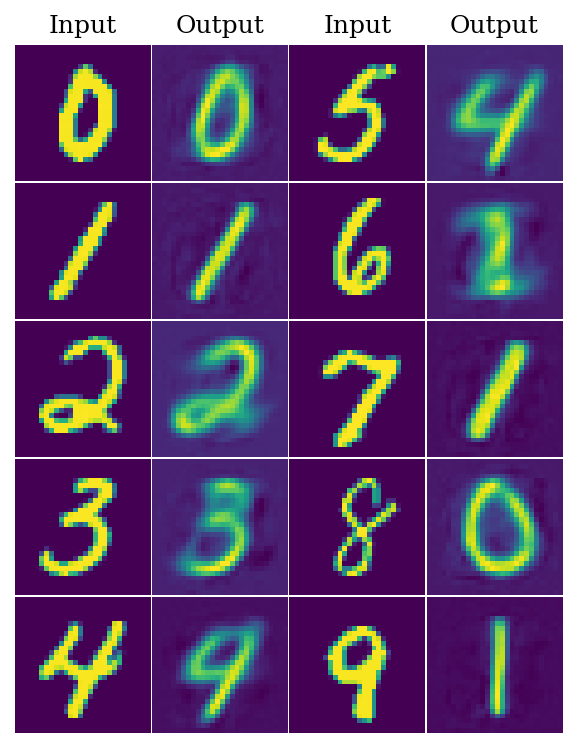

In [9]:
fig, axispack = plt.subplots(figsize=(4.1, 5.1), nrows=5, ncols=4, dpi=150)
for ii in range(5):
    idx = np.where(targets==ii)[0][0]#np.random.choice(np.where(targets==ii)[0])
    
    input_data = data[idx].numpy()
    input_data = input_data.reshape(28,28)
    
    axispack[ii][0].imshow(input_data)
    axispack[ii][0].axis('off')
    
    #output = out[idx].detach().numpy()
    output = torch.reshape(model.decode(model.encode(torch.reshape(data[idx], [1, 784]))), [28,28]).detach().numpy()
    output = output.reshape(28,28)
    
    axispack[ii][1].imshow(output)
    axispack[ii][1].axis('off')
    
    idx =np.where(targets==ii+5)[0][5] #np.random.choice(np.where(targets==ii+5)[0])
    print(idx)
    input_data = data[idx].numpy()
    input_data = input_data.reshape(28,28)
    
    axispack[ii][2].imshow(input_data)
    axispack[ii][2].axis('off')
    print(idx)
    output = out[idx].detach().numpy()
    output = output.reshape(28,28)
    
    axispack[ii][3].imshow(output)
    axispack[ii][3].axis('off')

axispack[0][0].set_title("Input")
axispack[0][1].set_title("Output")
axispack[0][2].set_title("Input")
axispack[0][3].set_title("Output")
fig.subplots_adjust(left=0.1, bottom=0.01, right=0.99, top=0.91, wspace=0.01, hspace=0.01)
plt.savefig("3_1_digits_epoch_{0}.png".format(int(epoch)), bbox_inches='tight', pad_inches=0.01)

In [85]:
ii=0
for data, targets in train_loader:
    ii +=1
    try:
        encoded_img = torch.reshape(model.decode(model.encode(torch.reshape(data[ii%128], [1, 784]))), [28,28])
        torchvision.utils.save_image(encoded_img, "embedded_digits_problem_3_1/encoded_image_{0}.png".format(ii))
    except IndexError:
        continue
    if ii==1000:
        break

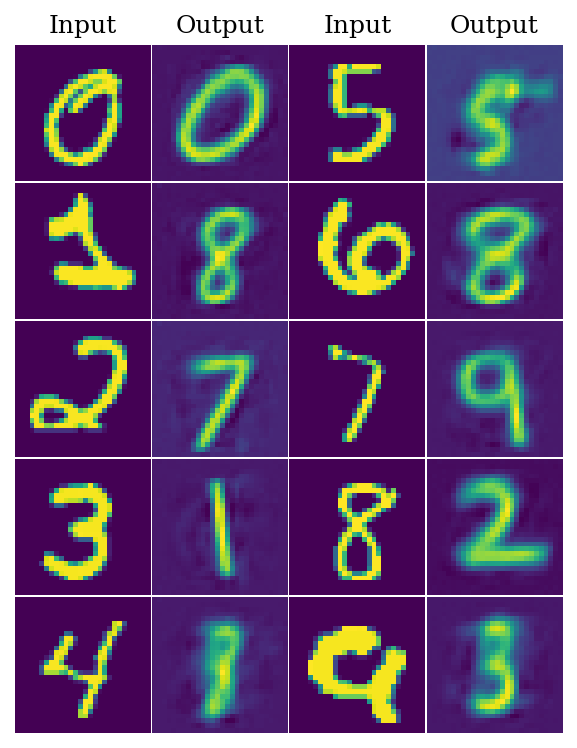

In [110]:
fig, axispack = plt.subplots(figsize=(4.1, 5.1), nrows=5, ncols=4, dpi=150)
for ii in range(5):
    idx = np.where(targets==ii)[0][0]
    
    input_data = data[idx].numpy()
    input_data = input_data.reshape(28,28)
    
    axispack[ii][0].imshow(input_data)
    axispack[ii][0].axis('off')
    
    output = out[idx].detach().numpy()
    output = output.reshape(28,28)
    
    axispack[ii][1].imshow(output)
    axispack[ii][1].axis('off')
    
    idx = np.where(targets==ii+5)[0][0]
    input_data = data[idx].numpy()
    input_data = input_data.reshape(28,28)
    
    axispack[ii][2].imshow(input_data)
    axispack[ii][2].axis('off')
    
    output = out[idx].detach().numpy()
    output = output.reshape(28,28)
    
    axispack[ii][3].imshow(output)
    axispack[ii][3].axis('off')

axispack[0][0].set_title("Input")
axispack[0][1].set_title("Output")
axispack[0][2].set_title("Input")
axispack[0][3].set_title("Output")
fig.subplots_adjust(left=0.1, bottom=0.01, right=0.99, top=0.91, wspace=0.01, hspace=0.01)
plt.savefig("3_1_digits_epoch_{0}.png".format(int(epoch)), bbox_inches='tight', pad_inches=0.01)

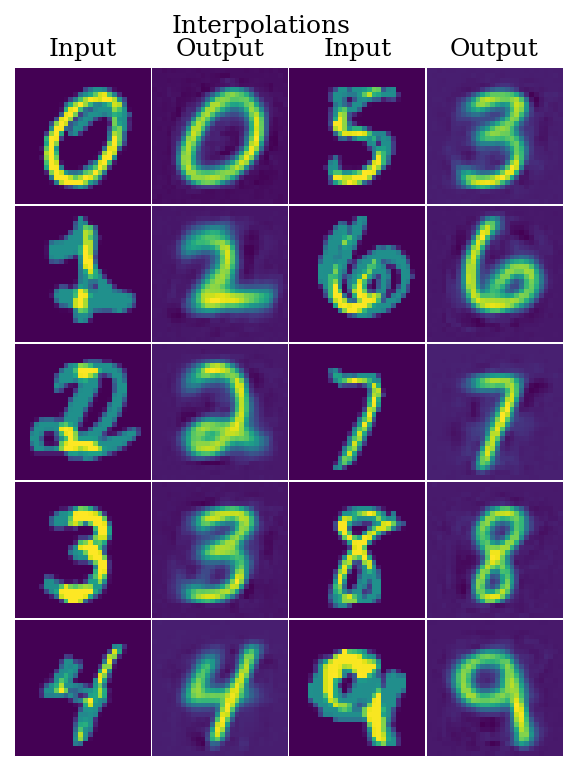

In [117]:
fig, axispack = plt.subplots(figsize=(4.1, 5.1), nrows=5, ncols=4, dpi=150)
for ii in range(5):
    idx1 = np.where(targets==ii)[0][0]#np.random.choice(np.where(targets==ii)[0])
    idx2 = np.where(targets==ii)[0][1]
    
    input_data1 = data[idx1].numpy()
    input_data2 = data[idx2].numpy()
    input_data = np.median([input_data1, input_data2], axis=0).reshape([28,28])
    
    axispack[ii][0].imshow(input_data)
    axispack[ii][0].axis('off')
    
    #output = out[idx].detach().numpy()
    output = torch.reshape(model.decode(model.encode(torch.reshape(torch.from_numpy(input_data), [1, 784]))), [28,28]).detach().numpy()
    output = output.reshape(28,28)
    
    axispack[ii][1].imshow(output)
    axispack[ii][1].axis('off')
    
    idx1 = np.where(targets==ii+5)[0][0]#np.random.choice(np.where(targets==ii)[0])
    idx2 = np.where(targets==ii+5)[0][1]
    
    input_data1 = data[idx1].numpy()
    input_data2 = data[idx2].numpy()
    input_data = np.median([input_data1, input_data2], axis=0).reshape([28,28])
    
    axispack[ii][2].imshow(input_data)
    axispack[ii][2].axis('off')
    
    #output = out[idx].detach().numpy()
    output = torch.reshape(model.decode(model.encode(torch.reshape(torch.from_numpy(input_data), [1, 784]))), [28,28]).detach().numpy()
    output = output.reshape(28,28)
    
    axispack[ii][3].imshow(output)
    axispack[ii][3].axis('off')

axispack[0][0].set_title("Input")
axispack[0][1].set_title("Output")
axispack[0][2].set_title("Input")
axispack[0][3].set_title("Output")
fig.suptitle("Interpolations")
fig.subplots_adjust(left=0.1, bottom=0.01, right=0.99, top=0.91, wspace=0.01, hspace=0.01)
plt.savefig("3_1_digits_interpolation_epoch_{0}.png".format(int(epoch)), bbox_inches='tight', pad_inches=0.01)

In [107]:
input_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [41]:

test_loader1000 = torch.utils.data.DataLoader(mnist_test, batch_size=1000)


torch.Size([1000, 2])
torch.Size([1000, 2])
torch.Size([1000, 2])
torch.Size([1000, 2])
torch.Size([1000, 2])
torch.Size([1000, 2])
torch.Size([1000, 2])
torch.Size([1000, 2])
torch.Size([1000, 2])
torch.Size([1000, 2])


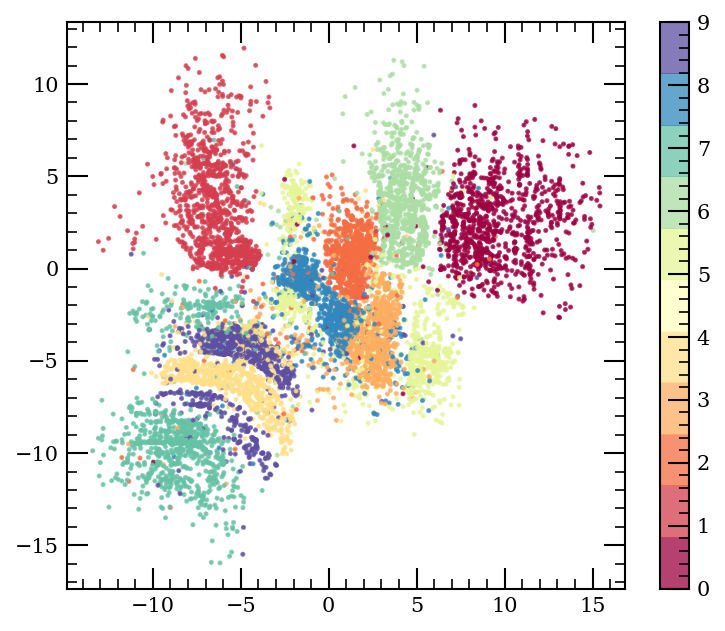

In [42]:
encoded_imgs = encoded_img
all_targets = targets_np
fig, axes = plt.subplots(dpi=150, figsize=(6,5))
for data1000, targets1000 in test_loader1000:
    encoded_img = model.encode(torch.reshape(data1000, [1000, 784]))
    print(encoded_img.shape)
    #     torchvision.utils.save_image(encoded_img, "embedded_digits_problem_3_1/encoded_image_1000_.png")
    encoded_img = encoded_img.detach().numpy()
    targets_np = targets1000.detach().numpy()
    encoded_imgs = np.vstack([encoded_imgs, encoded_img])
    all_targets = np.hstack([all_targets, targets_np])
    latent = axes.scatter(encoded_img[:,0], encoded_img[:,1], c=targets_np, cmap=cmap, s=2, alpha=0.75)
cbar = plt.colorbar(latent)
# plt.savefig("3_1_latent_space.png", bbox_inches="tight", pad_inches=0.01)

In [14]:
data1000

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [36]:
import phate
import scprep

In [45]:

phate_operator = phate.PHATE()
knn = 10
decay = 20
t = 15
phate_operator.set_params(knn=knn, decay=decay, t=t)
Y_phate = phate_operator.fit_transform(encoded_imgs)

Calculating PHATE...
  Running PHATE on 11000 observations and 2 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.29 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.39 seconds.
  Calculating landmark operator...
    Calculating SVD...


/opt/anaconda3/envs/py3/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 1000 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated SVD in 0.82 seconds.
    Calculating KMeans...
    Calculated KMeans in 12.24 seconds.
  Calculated landmark operator in 14.13 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.71 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.80 seconds.
Calculated PHATE in 25.05 seconds.


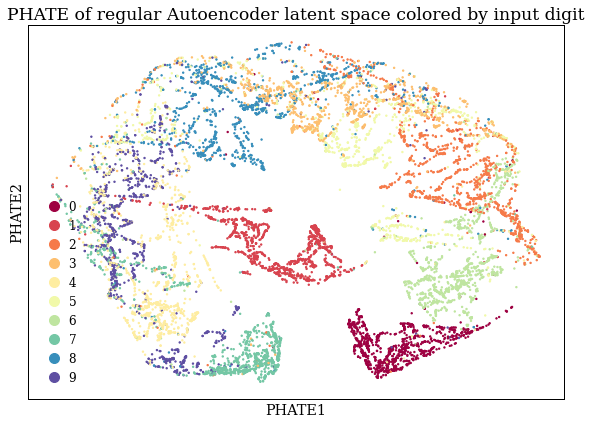

In [47]:

scprep.plot.scatter2d(Y_phate, figsize=(8, 6), c=all_targets, cmap="Spectral",
                          ticks=False, label_prefix="PHATE", title="PHATE of regular Autoencoder latent space colored by input digit")
plt.savefig("3_1_PHATE_latent_space.png")

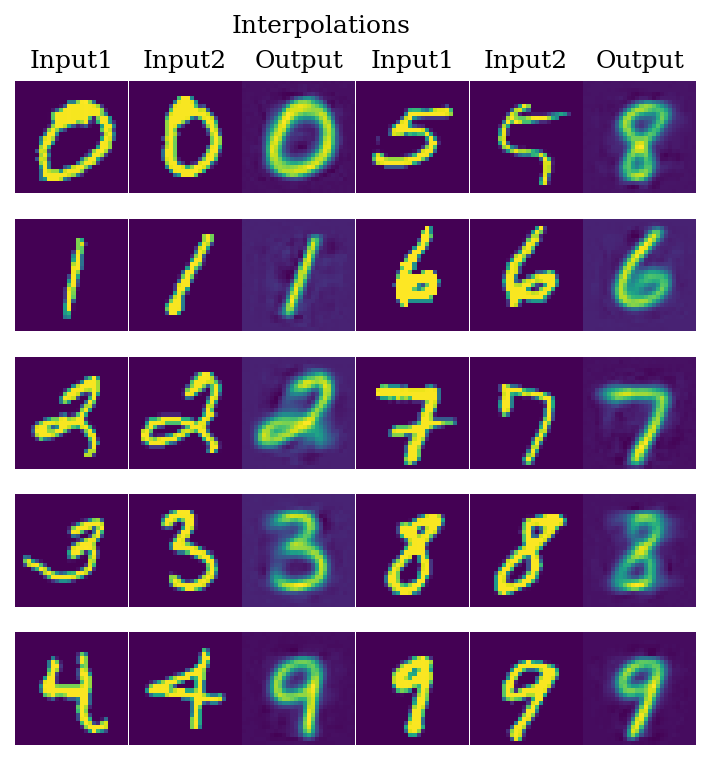

In [54]:
fig, axispack = plt.subplots(figsize=(5.1, 5.1), nrows=5, ncols=6, dpi=150)
for ii in range(5):
    idx1 = np.where(targets==ii)[0][0]#np.random.choice(np.where(targets==ii)[0])
    idx2 = np.where(targets==ii)[0][1]
    
    input_data1 = data[idx1].numpy()
    input_data2 = data[idx2].numpy()
    
    input_encode1 = model.encode(torch.reshape(torch.from_numpy(input_data1), [1, 784]))
    input_encode2 = model.encode(torch.reshape(torch.from_numpy(input_data2), [1, 784]))
    
    interp_data = np.median([input_data1, input_data2], axis=0).reshape([28,28])
    
    axispack[ii][0].imshow(input_data1.reshape(28,28))
    axispack[ii][0].axis('off')
    axispack[ii][1].imshow(input_data2.reshape(28,28))
    axispack[ii][1].axis('off')
    #output = out[idx].detach().numpy()
    #output = torch.reshape(model.decode(model.encode(torch.reshape(torch.from_numpy(input_data), [1, 784]))), [28,28]).detach().numpy()
    output = torch.reshape(model.decode(model.encode(torch.reshape(torch.from_numpy(interp_data), [1, 784]))), [28,28]).detach().numpy()
    output = output.reshape(28,28)
    
    axispack[ii][2].imshow(output)
    axispack[ii][2].axis('off')
    
    idx1 = np.where(targets==ii+5)[0][0]#np.random.choice(np.where(targets==ii)[0])
    idx2 = np.where(targets==ii+5)[0][1]
    
    input_data1 = data[idx1].numpy()
    input_data2 = data[idx2].numpy()
    
    input_encode1 = model.encode(torch.reshape(torch.from_numpy(input_data1), [1, 784]))
    input_encode2 = model.encode(torch.reshape(torch.from_numpy(input_data2), [1, 784]))
    
    interp_data = np.median([input_data1, input_data2], axis=0).reshape([28,28])
    
    axispack[ii][3].imshow(input_data1.reshape(28,28))
    axispack[ii][3].axis('off')
    axispack[ii][4].imshow(input_data2.reshape(28,28))
    axispack[ii][4].axis('off')
    
    output = torch.reshape(model.decode(model.encode(torch.reshape(torch.from_numpy(interp_data), [1, 784]))), [28,28]).detach().numpy()
    output = output.reshape(28,28)
    
    axispack[ii][5].imshow(output)
    axispack[ii][5].axis('off')

axispack[0][0].set_title("Input1")
axispack[0][1].set_title("Input2")
axispack[0][2].set_title("Output")
axispack[0][3].set_title("Input1")
axispack[0][4].set_title("Input2")
axispack[0][5].set_title("Output")
fig.suptitle("Interpolations")
fig.subplots_adjust(left=0.1, bottom=0.01, right=0.99, top=0.91, wspace=0.01, hspace=0.01)
# plt.savefig("3_1_digits_interpolation_epoch_{0}.png".format(int(epoch)), bbox_inches='tight', pad_inches=0.01)

(-0.5, 27.5, 27.5, -0.5)

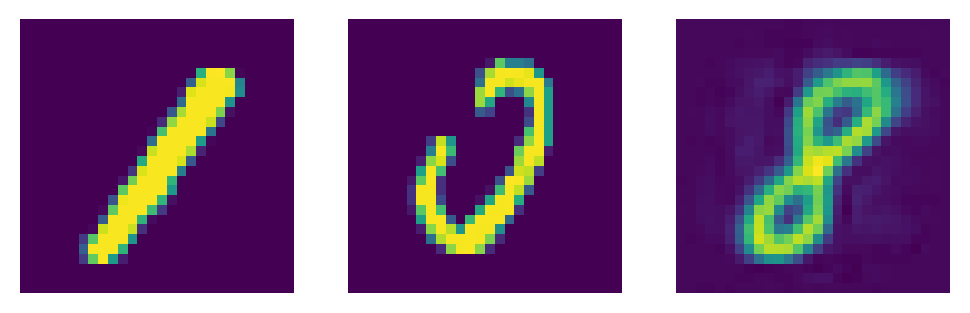

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=200)
idx1 = np.random.choice(range(len(targets)))
idx2 = np.random.choice(range(len(targets)))

input_data1 = data[idx1].numpy()
input_data2 = data[idx2].numpy()

input_encode1 = model.encode(torch.reshape(torch.from_numpy(input_data1), [1, 784]))
input_encode2 = model.encode(torch.reshape(torch.from_numpy(input_data2), [1, 784]))

interp_data = np.median([input_data1, input_data2], axis=0).reshape([28,28])

axes[0].imshow(input_data1.reshape(28,28))
axes[0].axis('off')
axes[1].imshow(input_data2.reshape(28,28))
axes[1].axis('off')

output = torch.reshape(model.decode(model.encode(torch.reshape(torch.from_numpy(interp_data), [1, 784]))), [28,28]).detach().numpy()
output = output.reshape(28,28)

axes[2].imshow(output)
axes[2].axis('off')